In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
def get_unweighted_pmf(df: pd.DataFrame, column:str) -> pd.Series:
    freq = df[column].value_counts()
    pmf = freq / len(df)

    return pmf

def get_weighted_pmf(df: pd.DataFrame, column:str) -> pd.Series:

    total_pop = df['WTFA_C'].sum()
    group_df = df.groupby(by = column, observed= True)
    freq = group_df['WTFA_C'].sum()
    pmf = freq / total_pop

    return pmf

# Load Data and Prep for use

In [3]:
df = pd.read_csv('data/final_data_set.csv',
                 sep=',',
                 header=0,
                 low_memory=False,
                )


In [4]:
### create a copy of the SRVY_YR field for indexing
df['I_SRVY_YR'] = df['SRVY_YR']
#### set the index
df.set_index(['HHX','I_SRVY_YR','FMX','FPX'],inplace=True)

In [5]:
### reclass the objects as category
for col in ['HISPALLP_C','REGION','SEX_C','ASDNW_C','ASDEV_C','ADHDNW_C','ADHDEV_C']:
    df[col] = df[col].astype('category')

df.dtypes

SRVY_YR            int64
HISPALLP_C      category
REGION          category
SEX_C           category
AGEP_C             int64
ASDNW_C         category
ASDEV_C         category
ADHDNW_C        category
ADHDEV_C        category
WTFA_C           float64
BMICAT_C         float64
WEIGHTLBTC_C     float64
HEIGHTTC_C       float64
WTLB_C           float64
HEIGHT_C         float64
dtype: object

## Review Data Counts

In [6]:
### check out the values of the input file
cols = df.columns

for i in cols:
    print(f'{df[i].value_counts()} \n')

SRVY_YR
2014    13380
2012    13275
2013    12860
2011    12850
2005    12523
2015    12291
2010    11277
2009    11156
2016    11107
2006     9837
2007     9417
2019     9193
2017     8845
2008     8815
2018     8269
2021     8261
2023     7692
2022     7464
2020     5790
Name: count, dtype: int64 

HISPALLP_C
Non-Hispanic White only                     92748
Hispanic                                    53660
Non-Hispanic Black/African American only    26794
Other single and multiple races              8006
Non-Hispanic Asian only                      2563
Non-Hispanic AIAN only                       1366
Non-Hispanic AIAN and any other group         369
Don't Know                                    291
Name: count, dtype: int64 

REGION
South        70839
West         52884
Midwest      39826
Northeast    30753
Name: count, dtype: int64 

SEX_C
Male          99898
Female        94386
Refused          13
Don't Know        5
Name: count, dtype: int64 

AGEP_C
16    12889
17    12705
15 

# Create Historgrams

Text(0.5, 1.0, 'Histogram of Survey Year')

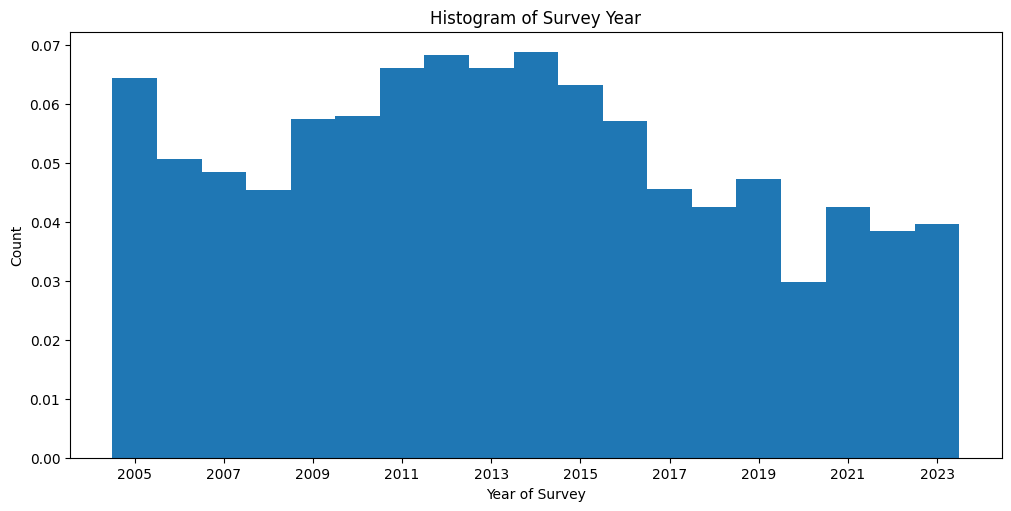

In [7]:
fig, ax = plt.subplots(figsize=(10, 5), layout='constrained')
n, bins, patches = ax.hist(np.asarray(df['SRVY_YR']),
                           bins=range(min(df['SRVY_YR']), max(df['SRVY_YR']) + 2),
                           density=True,
                           align = 'left',
                          )


ax.set_xticks(np.arange(2005,2024,2))
ax.set_xlabel('Year of Survey')
ax.set_ylabel('Count')
ax.set_title('Histogram of Survey Year')

In [8]:
df['SRVY_YR'].describe()

count    194302.000000
mean       2013.343949
std           5.169500
min        2005.000000
25%        2009.000000
50%        2013.000000
75%        2017.000000
max        2023.000000
Name: SRVY_YR, dtype: float64

Text(0.5, 1.0, 'Histogram of Age')

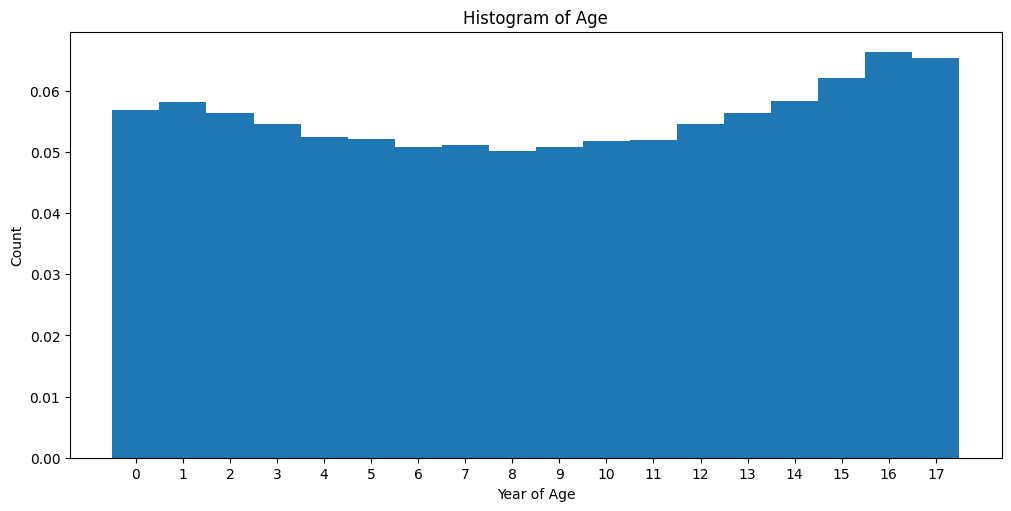

In [9]:
fig, ax = plt.subplots(figsize=(10, 5), layout='constrained')
n, bins, patches = ax.hist(np.asarray(df['AGEP_C']),
                           bins=range(min(df['AGEP_C']), max(df['AGEP_C']) + 2),
                           density=True,
                           align = 'left',)


ax.set_xticks(np.arange(0,18,1))
ax.set_xlabel('Year of Age')
ax.set_ylabel('Count')
ax.set_title('Histogram of Age')

In [10]:
df['AGEP_C'].describe()

count    194302.000000
mean          8.722031
std           5.348936
min           0.000000
25%           4.000000
50%           9.000000
75%          14.000000
max          17.000000
Name: AGEP_C, dtype: float64

Text(0.5, 1.0, 'Histogram of WEIGHTLBTC_C')

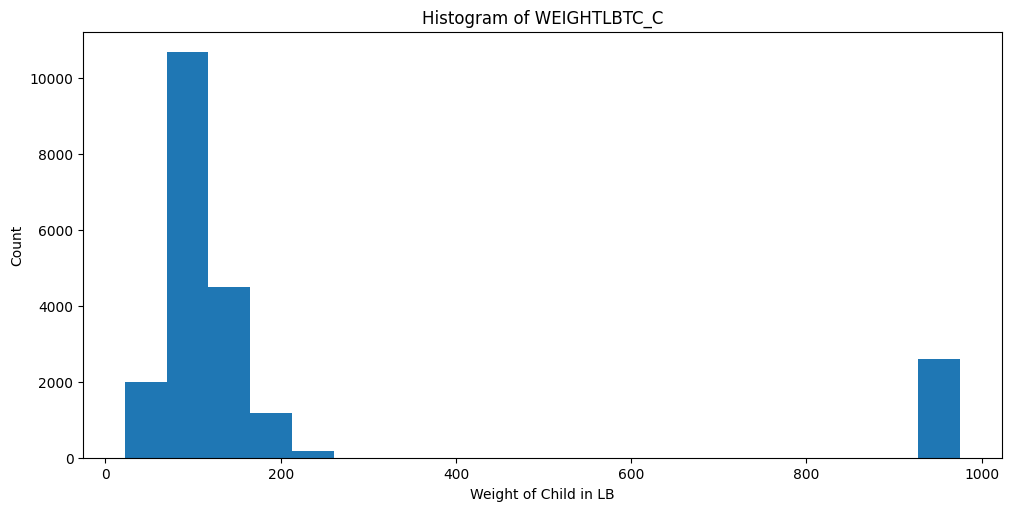

In [11]:
fig, ax = plt.subplots(figsize=(10, 5), layout='constrained')
n, bins, patches = ax.hist(np.asarray(df['WEIGHTLBTC_C'].dropna()),
                           bins = 20,
                           density=False,
                           align = 'left',
                          )

ax.set_xlabel('Weight of Child in LB')
ax.set_ylabel('Count')
ax.set_title('Histogram of WEIGHTLBTC_C')

In [12]:
print(df['WEIGHTLBTC_C'].describe())
print('--------------------------------------------')
print(df['WEIGHTLBTC_C'].value_counts())

count    21150.000000
mean       237.978203
std        286.085548
min         46.000000
25%        110.000000
50%        130.000000
75%        170.000000
max        999.000000
Name: WEIGHTLBTC_C, dtype: float64
--------------------------------------------
WEIGHTLBTC_C
996.0    1889
120.0    1422
130.0    1228
110.0    1070
140.0    1008
         ... 
227.0       1
241.0       1
267.0       1
236.0       1
233.0       1
Name: count, Length: 216, dtype: int64


Text(0.5, 1.0, 'Histogram of BMICAT_C')

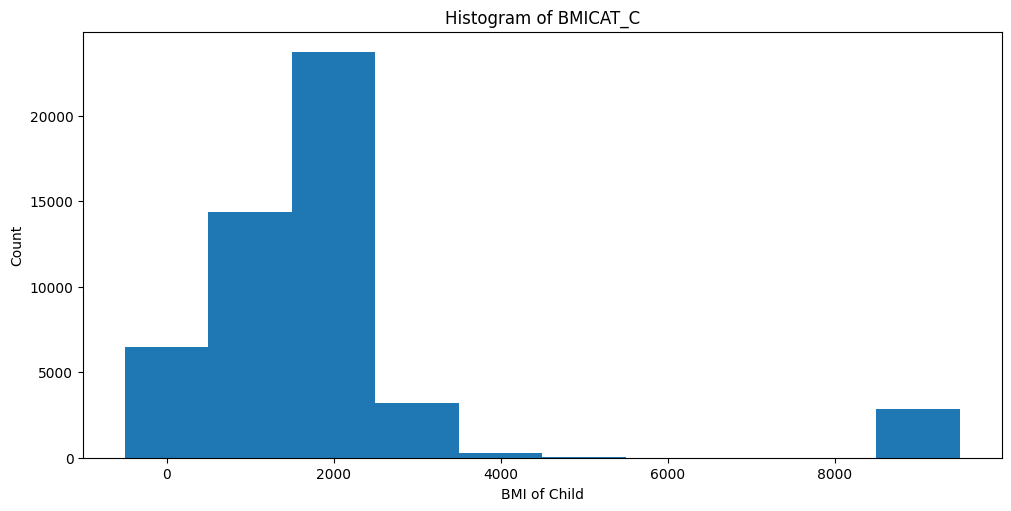

In [13]:
fig, ax = plt.subplots(figsize=(10, 5), layout='constrained')
n, bins, patches = ax.hist(np.asarray(df['BMICAT_C'].dropna()),
                           density=False,
                           align = 'left',
                          )

ax.set_xlabel('BMI of Child')
ax.set_ylabel('Count')
ax.set_title('Histogram of BMICAT_C')

In [14]:
print(df['BMICAT_C'].describe())
print('--------------------------------------------')
print(df['BMICAT_C'].value_counts())

count    50921.000000
mean      2397.386697
std       2040.890025
min          1.000000
25%       1802.000000
50%       2104.000000
75%       2504.000000
max       9999.000000
Name: BMICAT_C, dtype: float64
--------------------------------------------
BMICAT_C
2.0       3678
9999.0    2831
3.0       1030
4.0       1017
9.0        450
          ... 
3237.0       1
4628.0       1
3049.0       1
4634.0       1
4029.0       1
Name: count, Length: 1987, dtype: int64


Text(0.5, 1.0, 'Histogram of HEIGHTTC_C')

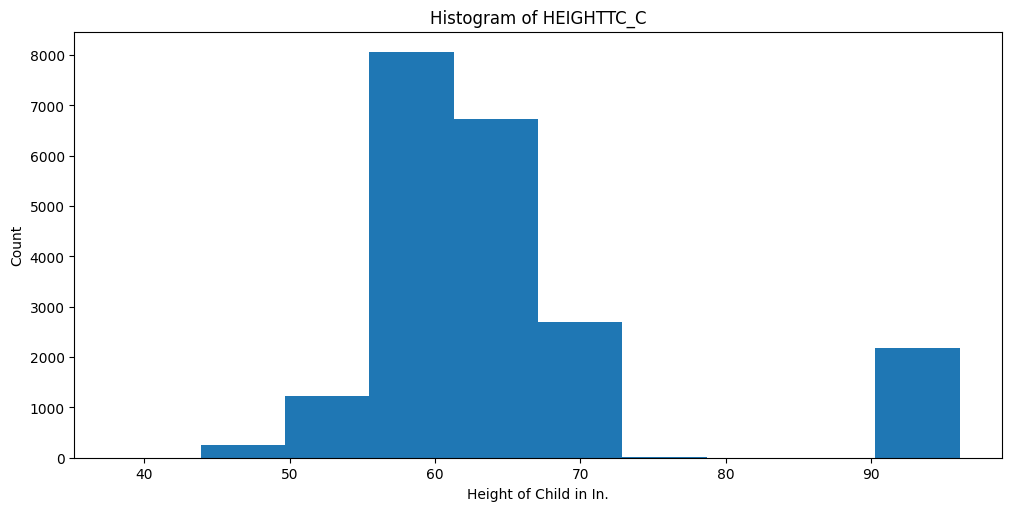

In [15]:
fig, ax = plt.subplots(figsize=(10, 5), layout='constrained')
n, bins, patches = ax.hist(np.asarray(df['HEIGHTTC_C'].dropna()),
                           density=False,
                           align = 'left',
                          )

ax.set_xlabel('Height of Child in In.')
ax.set_ylabel('Count')
ax.set_title('Histogram of HEIGHTTC_C')

In [16]:
print(df['HEIGHTTC_C'].describe())
print('--------------------------------------------')
print(df['HEIGHTTC_C'].value_counts())

count    21150.000000
mean        67.784870
std         10.666123
min         41.000000
25%         62.000000
50%         65.000000
75%         69.000000
max         99.000000
Name: HEIGHTTC_C, dtype: float64
--------------------------------------------
HEIGHTTC_C
64.0    1929
96.0    1744
66.0    1645
62.0    1596
65.0    1575
63.0    1517
60.0    1403
67.0    1350
68.0    1189
61.0    1040
69.0     975
70.0     869
71.0     622
72.0     599
59.0     577
58.0     354
99.0     340
73.0     322
57.0     285
56.0     244
74.0     209
54.0     170
53.0      91
55.0      83
75.0      66
48.0      64
98.0      60
52.0      54
50.0      54
51.0      53
97.0      32
49.0      29
76.0       7
43.0       1
47.0       1
41.0       1
Name: count, dtype: int64


Text(0.5, 1.0, 'Histogram of WTFA_C')

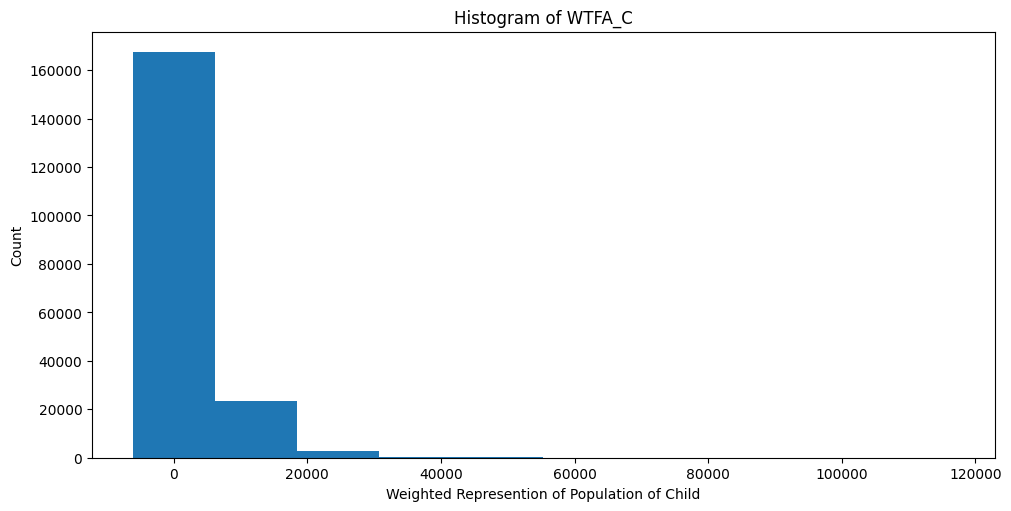

In [17]:
fig, ax = plt.subplots(figsize=(10, 5), layout='constrained')
n, bins, patches = ax.hist(np.asarray(df['WTFA_C']),
                           density=False,
                           align = 'left',
                          )

ax.set_xlabel('Weighted Represention of Population of Child')
ax.set_ylabel('Count')
ax.set_title('Histogram of WTFA_C')

In [18]:
print(df['WTFA_C'].describe())
print('--------------------------------------------')
print(df['WTFA_C'].value_counts())

count    194302.000000
mean       7179.855383
std        5837.325984
min          63.000000
25%        3383.000000
50%        5561.000000
75%        9321.954000
max      122902.915000
Name: WTFA_C, dtype: float64
--------------------------------------------
WTFA_C
4274.000     51
2902.000     51
2704.000     50
4670.000     50
2752.000     48
             ..
3076.784      1
6949.509      1
21852.202     1
5988.254      1
19146.000     1
Name: count, Length: 58878, dtype: int64


Text(0.5, 1.0, 'Bar of ADHDEV_C')

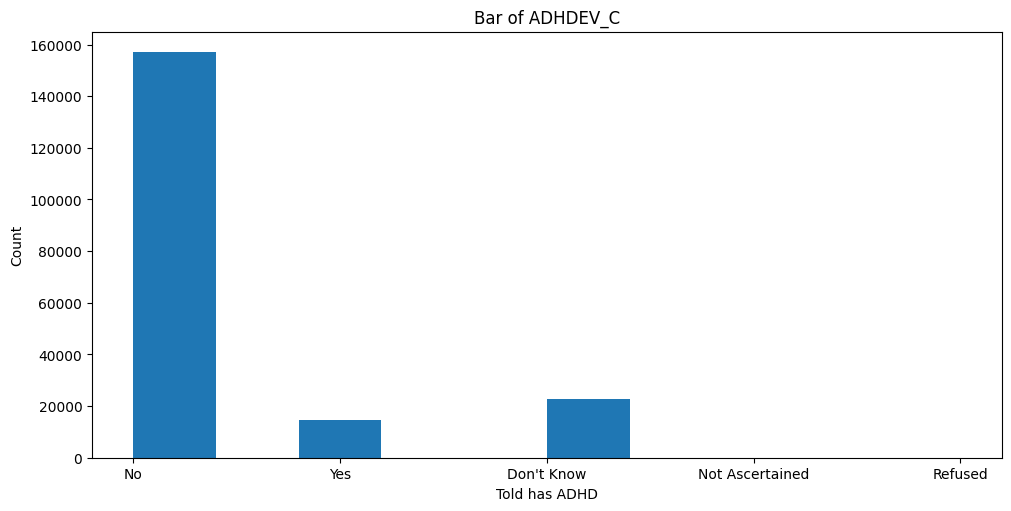

In [19]:
fig, ax = plt.subplots(figsize=(10, 5), layout='constrained')
n, bins, patches = ax.hist(np.asarray(df['ADHDEV_C'].dropna()),
                           density=False,
                           align = 'mid',
                          )

ax.set_xlabel('Told has ADHD')
ax.set_ylabel('Count')
ax.set_title('Bar of ADHDEV_C')

### PMF to compaire two senerios 

In [20]:
### data prep for PMF
pre_covid = df[df['SRVY_YR'] < 2020]
post_covid = df[df['SRVY_YR'] >= 2020]


In [21]:
## PMF on base data
pre_covid_base_pmf = get_unweighted_pmf(pre_covid, 'ADHDEV_C')
post_covid_pmf =  get_unweighted_pmf(post_covid, 'ADHDEV_C')


print('Pre Covid')
print('--------------------------------')
print(pre_covid_base_pmf)
print('--------------------------------')
print('Post Covid')
print('--------------------------------')
print(post_covid_pmf)

Pre Covid
--------------------------------
ADHDEV_C
No                 0.810951
Don't Know         0.117199
Yes                0.071407
Refused            0.000412
Not Ascertained    0.000030
Name: count, dtype: float64
--------------------------------
Post Covid
--------------------------------
ADHDEV_C
No                 0.795905
Don't Know         0.111377
Yes                0.091998
Refused            0.000616
Not Ascertained    0.000103
Name: count, dtype: float64


In [22]:
### PMF on Weighted Data

In [23]:
pre_covid_wgtd_pmf = get_weighted_pmf(pre_covid, 'ADHDEV_C')
post_covid_wgtd_pmf =  get_weighted_pmf(post_covid, 'ADHDEV_C')

print('Pre Covid')
print('--------------------------------')
print(pre_covid_wgtd_pmf)
print('--------------------------------')
print('Post Covid')
print('--------------------------------')
print(post_covid_wgtd_pmf)

Pre Covid
--------------------------------
ADHDEV_C
Don't Know         0.108053
No                 0.819150
Not Ascertained    0.000038
Refused            0.000417
Yes                0.072343
Name: WTFA_C, dtype: float64
--------------------------------
Post Covid
--------------------------------
ADHDEV_C
Don't Know         0.105225
No                 0.805383
Not Ascertained    0.000119
Refused            0.000595
Yes                0.088678
Name: WTFA_C, dtype: float64


<BarContainer object of 5 artists>

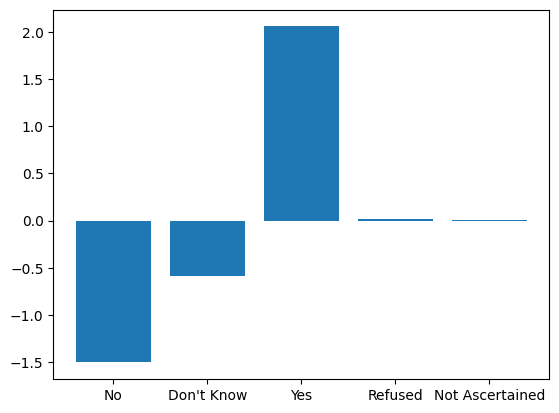

In [24]:
Diffs = (post_covid_pmf - pre_covid_base_pmf) * 100
groups = Diffs.index.values

fig, ax = plt.subplots()

ax.bar(groups,Diffs)


<BarContainer object of 5 artists>

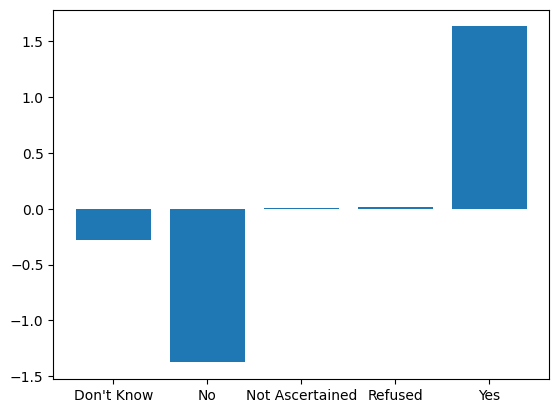

In [25]:
Diffs = (post_covid_wgtd_pmf - pre_covid_wgtd_pmf) * 100
groups = Diffs.index.values

fig, ax = plt.subplots()

ax.bar(groups,Diffs)


In [26]:
# pre_covid_wgtd_pmf = get_weighted_pmf(pre_covid, 'ADHDEV_C')
# post_covid_wgtd_pmf =  get_weighted_pmf(post_covid, 'ADHDEV_C')

pmfs = list()
yrs = [x for x in range(2005,2024)]

for yr in yrs:
    pmf = get_weighted_pmf(df[df['SRVY_YR']==yr],'ADHDEV_C')
    pmfs.append(pmf['Yes'])

Text(0.5, 1.0, 'Probability of being ADHD by Survey Year')

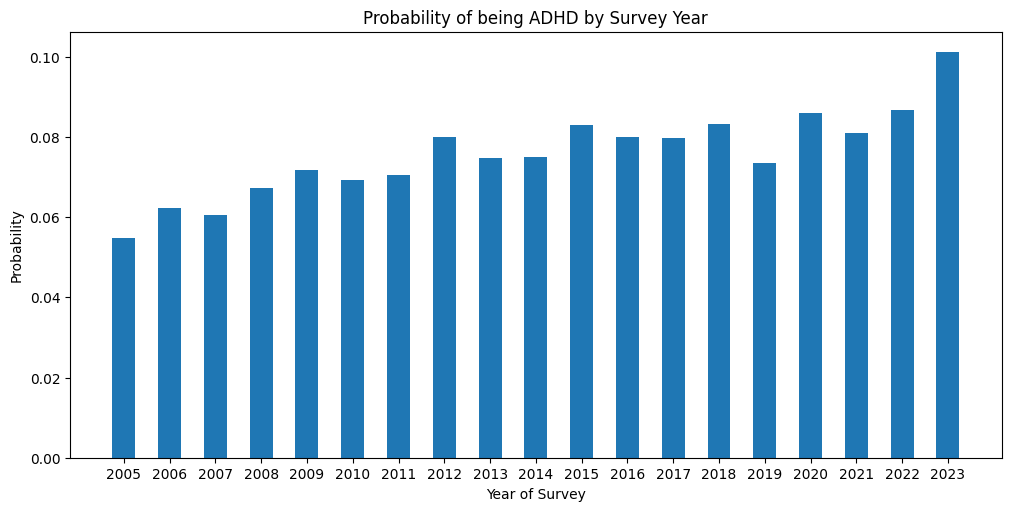

In [27]:
fig, ax = plt.subplots(figsize=(10, 5), layout='constrained')

ax.bar(
    x = yrs,
    height = pmfs,
    width = .5   
      )


ax.set_xticks(np.arange(2005,2024,1))
ax.set_xlabel('Year of Survey')
ax.set_ylabel('Probability')
ax.set_title('Probability of being ADHD by Survey Year')

### CDF review

In [28]:
def cal_base_cdf(srs: pd.Series) -> pd.Series:
    srtd_srs = np.sort(srs)
    
    cdf_values = np.arange(1, len(srtd_srs) + 1) / len(srtd_srs)
    
    return srtd_srs, cdf_values

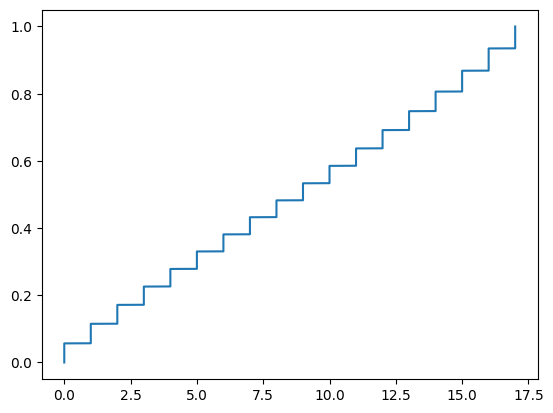

In [29]:
x, cdf = cal_base_cdf(df['AGEP_C'])


fig, ax = plt.subplots()
ax.plot(x,cdf)

In [41]:
ttl_x, ttl_cdf = cal_base_cdf(df['AGEP_C'])
ys_x, ys_cdf = cal_base_cdf(df[df['ADHDEV_C'] == 'Yes']['AGEP_C'])
no_x, no_cdf = cal_base_cdf(df[df['ADHDEV_C'] == 'No']['AGEP_C'])


Text(0.5, 1.0, "CDF's by Child Age")

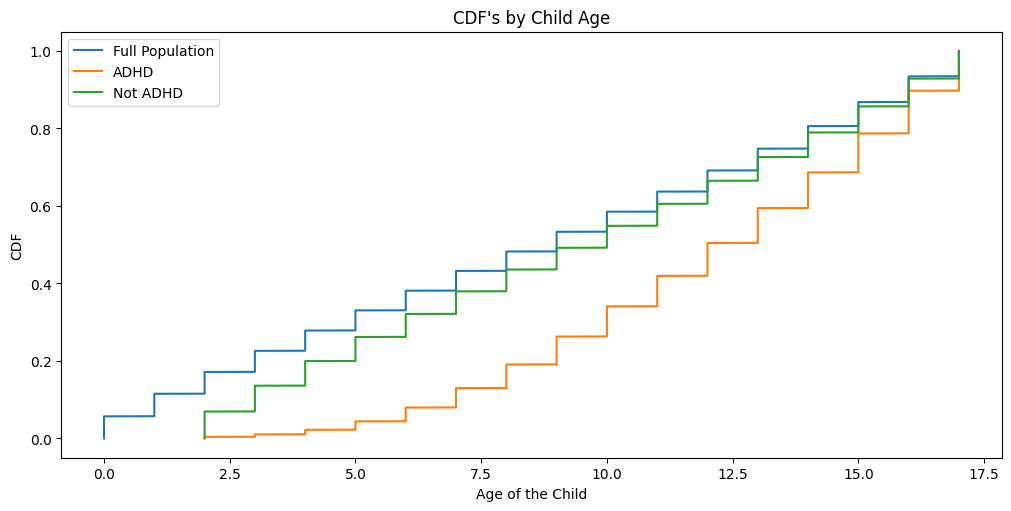

In [51]:
fig, ax = plt.subplots(figsize=(10, 5), layout='constrained')

ax.plot(ttl_x,ttl_cdf, label='Full Population')
ax.plot(ys_x,ys_cdf, label='ADHD')
ax.plot(no_x,no_cdf, label= 'Not ADHD')

ax.legend()
ax.set_xlabel('Age of the Child')
ax.set_ylabel('CDF')
ax.set_title('CDF\'s by Child Age')

Text(0.5, 1.0, "CDF's by Child Age")

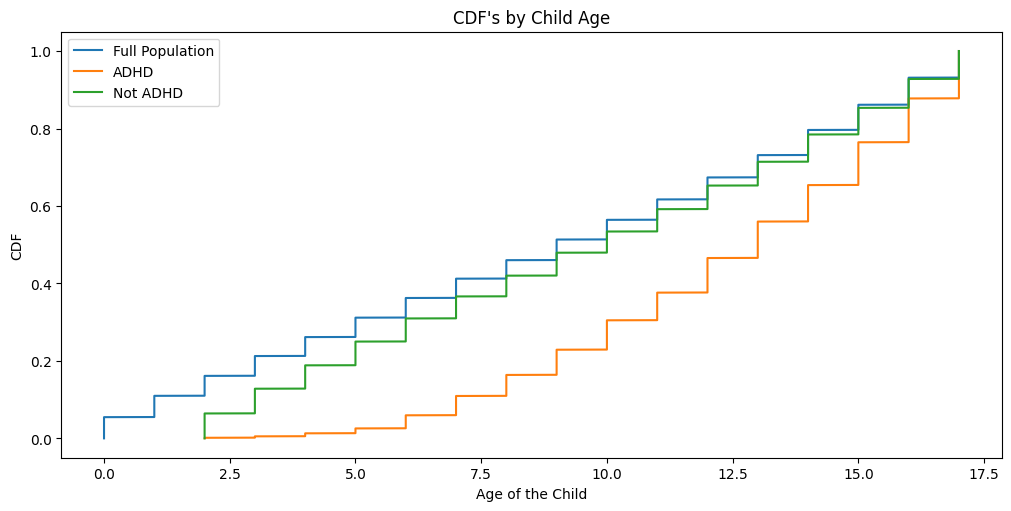

In [56]:
ttl_x, ttl_cdf = cal_base_cdf(df[df['SRVY_YR'] >= 2020]['AGEP_C'])
ys_x, ys_cdf = cal_base_cdf(df[(df['ADHDEV_C'] == 'Yes') & (df['SRVY_YR'] >= 2020)]['AGEP_C'])
no_x, no_cdf = cal_base_cdf(df[(df['ADHDEV_C'] == 'No') & (df['SRVY_YR'] >= 2020)]['AGEP_C'])


fig, ax = plt.subplots(figsize=(10, 5), layout='constrained')

ax.plot(ttl_x,ttl_cdf, label='Full Population')
ax.plot(ys_x,ys_cdf, label='ADHD')
ax.plot(no_x,no_cdf, label= 'Not ADHD')

ax.legend()
ax.set_xlabel('Age of the Child')
ax.set_ylabel('CDF')
ax.set_title('CDF\'s by Child Age')